In [1]:
from datetime import datetime
import pickle

# https://snap.stanford.edu/data/web-Movies.html
file="../../data/amazon/movies.txt"
file_counter="../../data/amazon/counted-year.pkl"
file_image="../../data/amazon/counted-year.svg"

In [2]:
# https://stackoverflow.com/a/19201448
def save_counter(obj):
    with open(file_counter, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_counter():
    with open(file_counter, 'rb') as f:
        return pickle.load(f)

In [3]:
# months
if(False):
    i=0
    stop=-100
    counter = {}
    with open(file, 'r', errors='ignore') as f:
        for line in f:
            #print(line)
            identifier = line.split(':')[0]
            if 'review/score' in identifier:
                score = line.split(':')[1].strip()
                #print(score)
            elif 'review/time' in identifier:
                time=str(datetime.fromtimestamp(int(line.split(':')[1].strip())))[0:7]
                #print(time)
            elif 'review/summary' in identifier:
                if not time in counter:
                    counter[time] = {}
                if not score in counter[time]:
                    counter[time][score] = 1
                else:
                    counter[time][score] += 1


                #if not time in counter:
                #    counter[time] = 1
                #else:
                #    counter[time] += 1
            # dev
            i=i+1
            if(i==stop):
                break

    save_counter(counter)

# years
if(False):
    i=0
    stop=-100
    counter = {}
    with open(file, 'r', errors='ignore') as f:
        for line in f:
            #print(line)
            identifier = line.split(':')[0]
            if 'review/score' in identifier:
                score = line.split(':')[1].strip()
                #print(score)
            elif 'review/time' in identifier:
                time=str(datetime.fromtimestamp(int(line.split(':')[1].strip())))[0:4]
                #print(time)
            elif 'review/summary' in identifier:
                if not time in counter:
                    counter[time] = {}
                if not score in counter[time]:
                    counter[time][score] = 1
                else:
                    counter[time][score] += 1


                #if not time in counter:
                #    counter[time] = 1
                #else:
                #    counter[time] += 1
            # dev
            i=i+1
            if(i==stop):
                break

    save_counter(counter)

In [4]:
counter=load_counter()
print(counter)

{'2007': {'3.0': 75239, '5.0': 452009, '4.0': 167632, '1.0': 49521, '2.0': 40205}, '2006': {'5.0': 311252, '1.0': 49049, '4.0': 135581, '2.0': 37992, '3.0': 66128}, '2008': {'2.0': 40138, '5.0': 412870, '3.0': 74057, '4.0': 161693, '1.0': 56076}, '2003': {'5.0': 205916, '4.0': 90527, '3.0': 43323, '1.0': 25734, '2.0': 24183}, '2002': {'5.0': 198712, '4.0': 84276, '3.0': 37798, '1.0': 25311, '2.0': 22641}, '2004': {'5.0': 257603, '4.0': 119160, '2.0': 33117, '1.0': 41016, '3.0': 60489}, '2000': {'5.0': 192002, '4.0': 73314, '1.0': 19944, '2.0': 17808, '3.0': 30907}, '2009': {'5.0': 422403, '4.0': 149771, '3.0': 73178, '2.0': 39680, '1.0': 59099}, '2011': {'3.0': 72055, '5.0': 465918, '4.0': 148457, '1.0': 72957, '2.0': 45767}, '2010': {'5.0': 426248, '1.0': 65343, '3.0': 70279, '4.0': 142000, '2.0': 41430}, '2001': {'5.0': 189638, '3.0': 35395, '4.0': 79152, '1.0': 24221, '2.0': 20320}, '2005': {'4.0': 138000, '5.0': 308080, '3.0': 71012, '1.0': 54744, '2.0': 40868}, '2012': {'5.0': 484

In [5]:
labels=[]
list_1=[]
list_2=[]
list_3=[]
list_4=[]
list_5=[]

def put(values, key, lst):
    if not key in values:
        lst.append(0)
    else:
        lst.append(values[key])

for key_time in sorted(counter):
    labels.append(key_time)
    if False:
        if not "1.0" in counter[key_time]:
            list_1.append(0)
        else:
            list_1.append(counter[key_time]["1.0"])
    put(counter[key_time], "1.0", list_1)
    put(counter[key_time], "2.0", list_2)
    put(counter[key_time], "3.0", list_3)
    put(counter[key_time], "4.0", list_4)
    put(counter[key_time], "5.0", list_5)
                
print("labels:", labels)
print()

print("5 scores for 16 years:")
print(list_1)
print(list_2)
print(list_3)
print(list_4)
print(list_5)
print()

total = sum(list_1) + sum(list_2) + sum(list_3) + sum(list_4) + sum(list_5)
print("Total number of datasets:", total)
print()

print("tmp percentages for figure")
print(100/total*800000)
print(100/total*700000)
print(100/total*600000)
print(100/total*500000)
print(100/total*400000)
print(100/total*300000)
print(100/total*200000)
print(100/total*100000)
print()

# 800,000         = 262,951px
print("Tmp pixels in figure", 262.951/800000*total/100)
print()

print("Percentages of scores (for paper text)")
print(sum(list_1), 100*sum(list_1)/total)
print(sum(list_2), 100*sum(list_2)/total)
print(sum(list_3), 100*sum(list_3)/total)
print(sum(list_4), 100*sum(list_4)/total)
print(sum(list_5), 100*sum(list_5)/total)
print(total, 100*total/total)
print()

labels: ['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012']

5 scores for 16 years:
[6, 191, 4844, 19944, 24221, 25311, 25734, 41016, 54744, 49049, 49521, 56076, 59099, 65343, 72957, 81276]
[1, 262, 3631, 17808, 20320, 22641, 24183, 33117, 40868, 37992, 40205, 40138, 39680, 41430, 45767, 47356]
[8, 442, 6458, 30907, 35395, 37798, 43323, 60489, 71012, 66128, 75239, 74057, 73178, 70279, 72055, 74826]
[29, 797, 14178, 73314, 79152, 84276, 90527, 119160, 138000, 135581, 167632, 161693, 149771, 142000, 148457, 150248]
[64, 3313, 49866, 192002, 189638, 198712, 205916, 257603, 308080, 311252, 452009, 412870, 422403, 426248, 465918, 484650]

Total number of datasets: 7911684

tmp percentages for figure
10.111627309685272
8.847673895974612
7.583720482263953
6.319767068553294
5.055813654842636
3.7918602411319764
2.527906827421318
1.263953413710659

Tmp pixels in figure 26.004815243550002

Percentages of scores (for pape

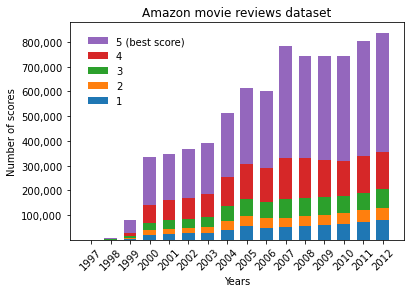

In [6]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

# imports
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np

fig, ax = plt.subplots()

# data for arrange stacked bars
l3bottom = [sum(pair) for pair in zip(list_1, list_2)]
l4bottom = [sum(pair) for pair in zip(l3bottom, list_3)]
l5bottom = [sum(pair) for pair in zip(l4bottom, list_4)]

# data
width = 0.66
ax.bar(labels, list_1, width, label='1')
ax.bar(labels, list_2, width, label='2', bottom=list_1)
ax.bar(labels, list_3, width, label='3', bottom=l3bottom)
ax.bar(labels, list_4, width, label='4', bottom=l4bottom)
ax.bar(labels, list_5, width, label='5', bottom=l5bottom)

# y axis, thousands separator
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# y axis, second one on right side
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/fahrenheit_celsius_scales.html
# -> manually
    
# x axis
plt.xticks(rotation = 45)

# legend box, inverted order by negative spacing
#ax.legend()
ax.legend([1,2,3,4,"5 (best score)"], frameon=False, labelspacing=-2.5, bbox_to_anchor=(.37, .7))

# labels
ax.set_ylabel('Number of scores')
ax.set_xlabel('Years')
ax.set_title('Amazon movie reviews dataset')

# save and plot
plt.savefig(file_image)
plt.show()

In [7]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

if(False):
    import matplotlib.pyplot as plt

    labels = ['G1', 'G2', 'G3', 'G4', 'G5']
    men_means = [20, 35, 30, 35, 27]
    women_means = [25, 32, 34, 20, 25]
    men_std = [2, 3, 4, 1, 2]
    women_std = [3, 5, 2, 3, 3]
    width = 0.35       # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()

    ax.bar(labels, men_means, width, yerr=men_std, label='Men')
    ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
           label='Women')

    ax.set_ylabel('Scores')
    ax.set_title('Scores by group and gender')
    ax.legend()

    plt.show()